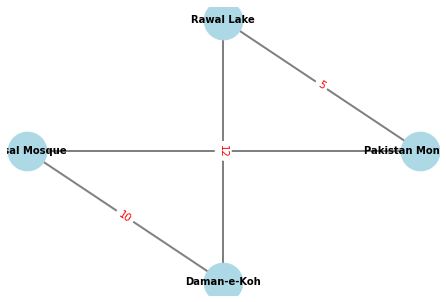

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (locations) to the graph
G.add_node("Faisal Mosque")
G.add_node("Daman-e-Koh")
G.add_node("Pakistan Monument")
G.add_node("Rawal Lake")

# Add edges (distances between locations)
G.add_edge("Faisal Mosque", "Daman-e-Koh", distance=10)
G.add_edge("Faisal Mosque", "Pakistan Monument", distance=8)
G.add_edge("Daman-e-Koh", "Rawal Lake", distance=12)
G.add_edge("Pakistan Monument", "Rawal Lake", distance=5)

# Visualize the graph
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10, font_weight="bold", edge_color="gray", width=2)
edge_labels = nx.get_edge_attributes(G, "distance")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")


# Show the visualization
plt.show()


In [57]:
# Depth-First Search (DFS)
dfs_path = list(nx.dfs_preorder_nodes(G, "Faisal Mosque"))
dfs_distance = sum(G.get_edge_data(dfs_path[i], dfs_path[i+1])["distance"] for i in range(len(dfs_path) - 1))
print("DFS Path:", dfs_path)
print("DFS Distance:", dfs_distance)




DFS Path: ['Faisal Mosque', 'Daman-e-Koh', 'Rawal Lake', 'Pakistan Monument']
DFS Distance: 27


In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq


# Breadth-First Search (BFS)
def bfs(graph, start, goal):
    visited = set()
    queue = [[start]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        
        if node == goal:
            return path
        
        if node not in visited:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
            
            visited.add(node)
    
    return None

bfs_path = bfs(G, "Faisal Mosque", "Rawal Lake")
bfs_edges = [(bfs_path[i], bfs_path[i+1]) for i in range(len(bfs_path)-1)]

bfs_distance = sum(G.get_edge_data(bfs_path[i], bfs_path[i+1])["distance"] for i in range(len(bfs_path) - 1))
print("BFS Path:", bfs_path)
print("BFS Distance:", bfs_distance)



BFS Path: ['Faisal Mosque', 'Daman-e-Koh', 'Rawal Lake']
BFS Distance: 22


In [64]:
# A* Search
def heuristic(node, goal):
    # Manhatten distance heuristic
    x1, y1 = pos[node]
    x2, y2 = pos[goal]
    return abs(x1 - x2) + abs(y1 - y2)

def astar(graph, start, goal, h_func):
    visited = set()
    heap = []
    heapq.heappush(heap, (0, start))
    path_costs = {start: (0, None)}
    
    while heap:
        cost, node = heapq.heappop(heap)
        
        if node == goal:
            path = [node]
            while node != start:
                node = path_costs[node][1]
                path.append(node)
            return list(reversed(path))
        
        if node not in visited:
            visited.add(node)
            neighbors = graph[node]
            for neighbor in neighbors:
                new_cost = path_costs[node][0] + graph[node][neighbor]["distance"]
                if neighbor not in path_costs or new_cost < path_costs[neighbor][0]:
                    path_costs[neighbor] = (new_cost, node)
                    priority = new_cost + h_func(neighbor, goal)
                    heapq.heappush(heap, (priority, neighbor))
    
    return None

astar_path = astar(G, "Faisal Mosque", "Rawal Lake", heuristic)
astar_edges = [(astar_path[i], astar_path[i+1]) for i in range(len(astar_path)-1)]

astar_distance = sum(G.get_edge_data(astar_path[i], astar_path[i+1])["distance"] for i in range(len(astar_path) - 1))
print("A* Path:", astar_path)
print("A* Distance:", astar_distance)



A* Path: ['Faisal Mosque', 'Pakistan Monument', 'Rawal Lake']
A* Distance: 13


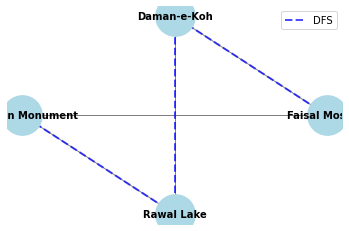

In [60]:


# Visualize the graph and paths
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500, linewidths=2)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color="blue", width=2, alpha=0.7, style="dashed", label="DFS")


plt.legend()
plt.axis("off")
plt.show()

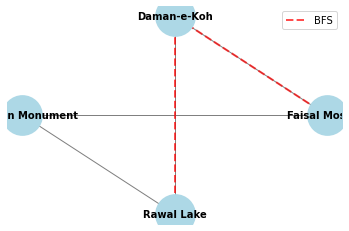

In [62]:



# Visualize the graph and paths
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500, linewidths=2)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color="red", width=2, alpha=0.7, style="dashed", label="BFS")

plt.legend()
plt.axis("off")
plt.show()


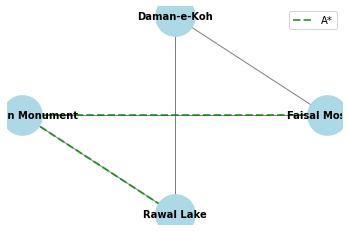

In [66]:
# Visualize the graph and paths
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500, linewidths=2)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

nx.draw_networkx_edges(G, pos, edgelist=astar_edges, edge_color="green", width=2, alpha=0.7, style="dashed", label="A*")

plt.legend()
plt.axis("off")
plt.show()